In [128]:
import numpy as np
import pickle
from facenet_models import FacenetModel
import skimage.io as io
from camera import take_picture
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from utils import cos_distance

In [129]:
class Profile:
    def __init__(self, name):
        self.name = name
        self.descriptors = []
        self.mean_descriptor = 0
        
    def add_descriptor(self, descriptor):
        self.descriptors.append(descriptor)
        self.mean_descriptor = np.mean(self.descriptors, axis=0)

In [130]:
# from profile import Profile

class Database:
     
    # initialize database
    def __init__(self):
        self.database = {}
        self.model = FacenetModel()
        
    # add image descriptor to profile, or create profile if it doesn't exist    
    def add_image(self, name, img):
        if img.shape[-1] > 1080 or img.shape[-2] > 1080:
            img = img[::4, ::4]
        boxes, probabilities, landmarks = self.model.detect(img)
        idxs = []
        for prob in probabilities:
            if prob >= 0.98:
                idxs.append(np.where(probabilities == prob)[0])
        descriptor = self.model.compute_descriptors(img, boxes[idxs])
        if descriptor.shape[0] == 1:
            if name in self.database:
                self.database[name].add_descriptor(descriptor)
            else:
                profile = Profile(name)
                profile.add_descriptor(descriptor)
                self.database[name] = profile
            self.save_database()
     
    def remove_profile(self, name):
        self.database.pop(name)
        
    def load_database(self):
        with open("./database.pkl", mode="rb") as db:
            self.database = pickle.load(db)
            
    def save_database(self):
        with open("./database.pkl", mode="wb") as db:
            pickle.dump(self.database, db)
            
    def create_database(self):
        self.database = {}
        
    # compare input to mean descriptors in database         
    def find_match(self, descriptor):
        #to change
        cutoff = 0.3
        dists = []
        names = []
        for name, value in self.database.items():
            dists.append(cos_distance(value.mean_descriptor, descriptor))
            names.append(name)
        if np.min(dists) < cutoff:
            return names[np.argmin(dists)]
        return "Unknown??"

In [131]:
def cos_distance(descriptor_1, descriptor_2):
    return 1 - descriptor_1 @ descriptor_2 / (np.linalg.norm(descriptor_1) * np.linalg.norm(descriptor_2))

In [132]:
# turn png/jpeg file into np array
def upload_picture(file_path):
    image = io.imread(file_path)
    if image.shape[-1] == 4:
    # Image is RGBA, where A is alpha -> transparency
    # Must make image RGB.
        image = image[..., :-1]  # png -> RGB
    return image

In [133]:
db = Database()
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_1.png"))
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_2.jpg"))
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_3.jpg"))
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_4.jpg"))
db.add_image("Dharshini", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Dharshini_5.jpg"))
db.add_image("Hyojae", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Hyojae_1.png"))
db.add_image("Hyojae", upload_picture(r"C:\Users\Hello\Desktop\Pics database\hyojae_2.jpg"))
db.add_image("Hyojae", upload_picture(r"C:\Users\Hello\Desktop\Pics database\hyojae_3.jpg"))
db.add_image("Hyojae", upload_picture(r"C:\Users\Hello\Desktop\Pics database\hyojae_4.jpg"))
db.add_image("Hyojae", upload_picture(r"C:\Users\Hello\Desktop\Pics database\hyojae_5.jpg"))
db.add_image("Joseph", upload_picture(r"C:\Users\Hello\Desktop\Joseph_1.png"))
db.add_image("Jacob", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Jacob_1.jpg"))
db.add_image("Jacob", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Jacob_1.png"))


[0.9999956]
0.9999956
[array([0], dtype=int64)]


<ipython-input-130-9b51b5b17f2b>:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  descriptor = self.model.compute_descriptors(img, boxes[idxs])


[0.9999956]
[0.9999999]
0.9999999
[array([0], dtype=int64)]
[0.9999999]
[0.99999774]
0.99999774
[array([0], dtype=int64)]
[0.99999774]
[0.99999845 0.70739883 0.81321794]
0.99999845
0.70739883
0.81321794
[array([0], dtype=int64)]
[0.99999845 0.70739883 0.81321794]
[0.99997115]
0.99997115
[array([0], dtype=int64)]
[0.99997115]
[0.9999999]
0.9999999
[array([0], dtype=int64)]
[0.9999999]
[0.99999774]
0.99999774
[array([0], dtype=int64)]
[0.99999774]
[0.98791146]
0.98791146
[array([0], dtype=int64)]
[0.98791146]
[0.99999976]
0.99999976
[array([0], dtype=int64)]
[0.99999976]
[0.99999964]
0.99999964
[array([0], dtype=int64)]
[0.99999964]
[0.99999976]
0.99999976
[array([0], dtype=int64)]
[0.99999976]
[0.9978655]
0.9978655
[array([0], dtype=int64)]
[0.9978655]
[0.999225]
0.999225
[array([0], dtype=int64)]
[0.999225]


FileNotFoundError: No such file: 'C:\Users\Hello\Desktop\Pics database\Jacob_2.png'

In [134]:
db.add_image("Jacob", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Jacob_2.jpg"))
db.add_image("Jacob", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Jacob_3.jpg"))


[0.9999888]
0.9999888
[array([0], dtype=int64)]


<ipython-input-130-9b51b5b17f2b>:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  descriptor = self.model.compute_descriptors(img, boxes[idxs])


[0.9999888]
[0.9999968]
0.9999968
[array([0], dtype=int64)]
[0.9999968]


FileNotFoundError: No such file: 'C:\Users\Hello\Desktop\Pics database\Jacob_4.jpg'

In [135]:
db.add_image("Jacob", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Jacob_4.jpeg"))
db.add_image("Kathryn", upload_picture(r"C:\Users\Hello\Desktop\Kathryn_1.png"))
db.add_image("Kathryn", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Kathryn_2.jpg"))
db.add_image("Kathryn", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Kathryn_3.jpg"))
db.add_image("Kathryn", upload_picture(r"C:\Users\Hello\Desktop\Pics database\Kathryn_4.jpg"))

[0.9998803]
0.9998803
[array([0], dtype=int64)]


<ipython-input-130-9b51b5b17f2b>:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  descriptor = self.model.compute_descriptors(img, boxes[idxs])


[0.9998803]
[0.9999995]
0.9999995
[array([0], dtype=int64)]
[0.9999995]
[0.99998426]
0.99998426
[array([0], dtype=int64)]
[0.99998426]
[0.99999964]
0.99999964
[array([0], dtype=int64)]
[0.99999964]
[0.9999516]
0.9999516
[array([0], dtype=int64)]
[0.9999516]


In [136]:
# plot image and label faces
def detect_faces(image):
    model = FacenetModel()
    boxes, probabilities, landmarks = model.detect(image)
    descriptor = model.compute_descriptors(image, boxes)

    fig, ax = plt.subplots()
    ax.imshow(image)

    for des, box, prob, landmark in zip(descriptor, boxes, probabilities, landmarks):
        # draw the box on the screen
        ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))
    
        # Get the landmarks/parts for the face in box d.
        # Draw the face landmarks on the screen.
        #for i in range(len(landmark)):
            #ax.plot(landmark[i, 0], landmark[i, 1], "+", color="blue")
        
        # add name labels to each box
        plt.text(box[:2][0],box[:2][1], db.find_match(des),color="white")

<IPython.core.display.Javascript object>


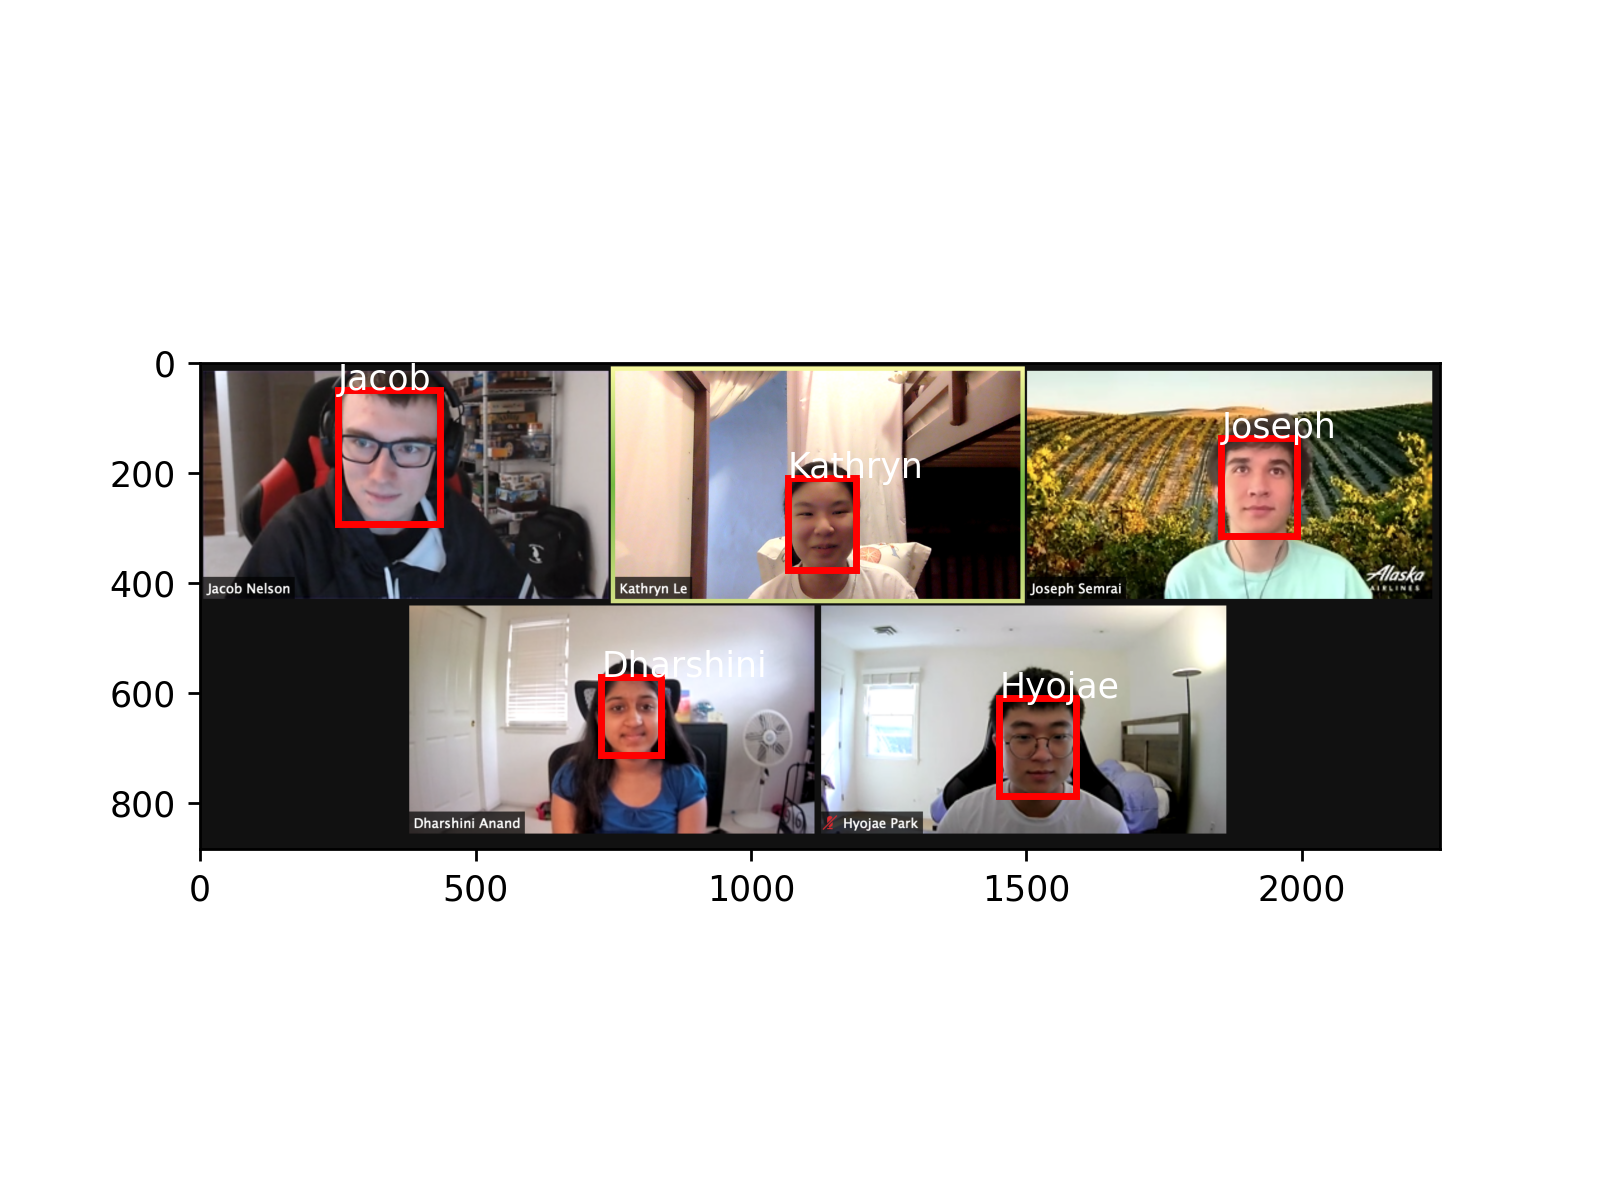

[array([1.0986218], dtype=float32), array([0.7319808], dtype=float32), array([0.9172199], dtype=float32), array([0.13273245], dtype=float32), array([1.0924472], dtype=float32)]
[array([0.8607402], dtype=float32), array([0.04985189], dtype=float32), array([0.82042384], dtype=float32), array([0.60230607], dtype=float32), array([0.64608574], dtype=float32)]
[array([1.0710901], dtype=float32), array([0.8545953], dtype=float32), array([0.07206941], dtype=float32), array([0.8478947], dtype=float32), array([0.8324222], dtype=float32)]
[array([0.9861704], dtype=float32), array([0.6475308], dtype=float32), array([0.8138102], dtype=float32), array([0.89739716], dtype=float32), array([0.06335729], dtype=float32)]
[array([0.04240215], dtype=float32), array([0.9082697], dtype=float32), array([1.0007443], dtype=float32), array([1.1331649], dtype=float32), array([0.95367646], dtype=float32)]


In [138]:
detect_faces(upload_picture(r"C:\Users\Hello\Desktop\group pic.png"))

In [ ]:
descriptors = db.database["Dharshini"].descriptors
control = descriptors[0]
similar_distances = []
negative_distances = []

for descriptor in descriptors:
    similar_distances.append(cos_distance(control, descriptor))
    
for value in db.database.values:
    negative_distances.append(cos_distance(control, value.descriptors[0]))

fig, ax = plt.subplots()
